In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import mne
mne.set_log_level(verbose=False)

from Datasets import *

In [4]:
path = "/media/usbdisk/data/ProyectoPSG/data/PSG1.edf"

In [5]:
dataset = EDFData_PTH(path)

In [ ]:
for a,b in dataset:
    break

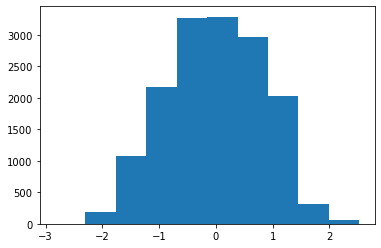

In [ ]:
plt.figure()
plt.hist(a[0])
plt.show()

In [2]:
import glob

In [3]:
import re 
import math
from pathlib import Path 

file_pattern = re.compile(r'.*?(\d+).*?')
def get_order(file):
    match = file_pattern.match(Path(file).name)
    if not match:
        return math.inf
    return int(match.groups()[0])

In [4]:
sorted_files = sorted(glob.glob("../Data/*.edf"), key=get_order)
sorted_files

['../Data\\PSG1.edf',
 '../Data\\PSG2.edf',
 '../Data\\PSG3.edf',
 '../Data\\PSG4.edf',
 '../Data\\PSG5.edf',
 '../Data\\PSG6.edf',
 '../Data\\PSG7.edf',
 '../Data\\PSG8.edf',
 '../Data\\PSG9.edf',
 '../Data\\PSG11.edf',
 '../Data\\PSG12.edf',
 '../Data\\PSG13.edf',
 '../Data\\PSG14.edf']

In [5]:
sorted_files_no_10 = [a for a in sorted_files if re.findall(r'\d+', a)[0]!='10']
sorted_files_no_10

['../Data\\PSG1.edf',
 '../Data\\PSG2.edf',
 '../Data\\PSG3.edf',
 '../Data\\PSG4.edf',
 '../Data\\PSG5.edf',
 '../Data\\PSG6.edf',
 '../Data\\PSG7.edf',
 '../Data\\PSG8.edf',
 '../Data\\PSG9.edf',
 '../Data\\PSG11.edf',
 '../Data\\PSG12.edf',
 '../Data\\PSG13.edf',
 '../Data\\PSG14.edf']

In [6]:
datasets = [EDFData_PTH(path_glob, channels=["C3"]) for path_glob in tqdm(sorted_files_no_10)]

100%|██████████| 13/13 [01:31<00:00,  7.00s/it]


In [7]:
dataset_concat = torch.utils.data.ConcatDataset(datasets)
len(dataset_concat)

10401

In [ ]:
test_size = 0.3
test_size = int(len(dataset_concat)*test_size)
train_size = len(dataset_concat) - test_size
train, test = torch.utils.data.random_split(dataset_concat, [train_size, test_size], generator=torch.Generator().manual_seed(42))
len(train), len(test)

(7898, 3384)

In [8]:
idx_train = np.loadtxt("../indices_train.txt").astype(int)
idx_test = np.loadtxt("../indices_test.txt").astype(int)
len(idx_train), len(idx_test)

(9776, 5265)

In [13]:
train_pablo = torch.utils.data.Subset(dataset_concat, indices=idx_train)
test_pablo = torch.utils.data.Subset(dataset_concat, indices=idx_test)
len(train_pablo), len(test_pablo), len(train_pablo)+len(test_pablo)

(9776, 5265, 15041)

In [16]:
labels = [datasets[0].id_to_class_dict[y.item()] for x,y in tqdm(dataset_concat)]
len(labels)

  0%|          | 0/15041 [00:00<?, ?it/s]

15041

In [18]:
from collections import Counter

In [18]:
Counter(labels)

Counter({'Sleep stage W': 2999,
         'Sleep stage N1': 863,
         'Sleep stage N2': 6388,
         'Sleep stage N3': 3286,
         'Sleep stage R': 1505})

In [10]:
trainloader = torch.utils.data.DataLoader(train_pablo, batch_size=32)
testloader = torch.utils.data.DataLoader(test_pablo, batch_size=32)
len(trainloader), len(testloader)

(306, 165)

In [16]:
train_pablo.indices

array([ 9805, 11803,  4395, ...,  8367,  4437,    97])

In [23]:
labels_train = []
labels_test = []

for x, y in tqdm(train_pablo):
    labels_train.append(datasets[0].id_to_class_dict[y.item()])
for x,y in tqdm(test_pablo):
    labels_test.append(datasets[0].id_to_class_dict[y.item()])

len(labels_train), len(labels_test)

  0%|          | 8/5265 [00:00<00:19, 275.85it/s]


(1, 8)

In [44]:
Counter(labels_train), Counter(labels_test)

(Counter({'Sleep stage N2': 4141,
          'Sleep stage N3': 2164,
          'Sleep stage N1': 565,
          'Sleep stage R': 963,
          'Sleep stage W': 1943}),
 Counter({'Sleep stage W': 1056,
          'Sleep stage N3': 1122,
          'Sleep stage R': 542,
          'Sleep stage N2': 2247,
          'Sleep stage N1': 298}))

In [24]:
counts_train = {'Sleep stage N2': 4141,
                'Sleep stage N3': 2164,
                'Sleep stage N1': 565,
                'Sleep stage R': 963,
                'Sleep stage W': 1943}

In [26]:
counts_train = np.array([565, 4141, 2164, 963, 1943])

In [28]:
counts_train / counts_train.sum()

array([0.0577946 , 0.42358838, 0.22135843, 0.09850655, 0.19875205])

In [34]:
(1-(counts_train / counts_train.sum())) / (1-(counts_train / counts_train.sum())).min()

array([1.63460515, 1.        , 1.35084295, 1.56397516, 1.39006211])

In [46]:
for a in datasets:
    print(a.id_to_class_dict)

{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 

In [49]:
import torch.nn as nn

In [51]:
class TinySleepNet(nn.Module):
    def __init__(self, sampling_rate, channels, classes, input_length=15360):
        super(TinySleepNet, self).__init__()
        self.sampling_rate = sampling_rate
        self.channels = channels
        self.classes = classes
        self.input_shape = (len(channels), input_length)

        self.feature_extraction = nn.Sequential(*[
            nn.Conv1d(in_channels=len(channels), out_channels=128, kernel_size=sampling_rate//2, stride=sampling_rate//4),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=8, stride=8),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=8, stride=1, padding=3),
            nn.ReLU(),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=8, stride=1, padding=3),
            nn.ReLU(),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=8, stride=1, padding=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=4)
        ])

        self.lstm = nn.LSTM(input_size=128, hidden_size=128, batch_first=True)
        
        self.classifier = nn.Linear(128*2, classes)

    def forward(self, X):
        X = self.feature_extraction(X)
        # X, _ = self.lstm(X.permute(0,2,1))
        # X = X[:,-1,:]
        X = X.view(X.shape[0],-1)
        X = self.classifier(X)
        return X

    def calculate_flatten_shape(self):
        """
        Makes a forward pass with a dummy tensor to calculate the output shape
        from the feature_extraction block.
        """
        X = torch.ones(size=(1,*self.input_shape))
        with torch.no_grad():
            X = self.feature_extraction(X)
        return math.prod(X.shape)

In [77]:
model = TinySleepNet(512, ['C3', 'C4'], classes=5)
model

TinySleepNet(
  (feature_extraction): Sequential(
    (0): Conv1d(2, 128, kernel_size=(256,), stride=(128,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (4): ReLU()
    (5): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (6): ReLU()
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (8): ReLU()
    (9): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LSTM(128, 128, batch_first=True)
  (classifier): Linear(in_features=256, out_features=5, bias=True)
)

In [78]:
weights = []
for a in model.parameters():
    weights.extend(a.detach().numpy().ravel())
len(weights)

592645

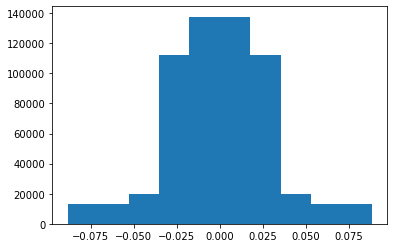

In [79]:
plt.figure()
plt.hist(weights)
plt.show()

In [80]:
def weights_init(m):
    if isinstance(m, nn.Conv1d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)

In [81]:
model.apply(weights_init)

TinySleepNet(
  (feature_extraction): Sequential(
    (0): Conv1d(2, 128, kernel_size=(256,), stride=(128,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (4): ReLU()
    (5): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (6): ReLU()
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (8): ReLU()
    (9): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LSTM(128, 128, batch_first=True)
  (classifier): Linear(in_features=256, out_features=5, bias=True)
)

In [82]:
weights = []
for a in model.parameters():
    weights.extend(a.detach().numpy().ravel())
len(weights)

592645

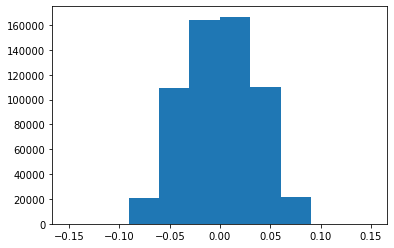

In [83]:
plt.figure()
plt.hist(weights)
plt.show()

In [7]:
import tensorflow as tf

In [8]:
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(128, kernel_size=256, padding='same', strides=128, activation="relu", input_shape=(15360,2)),
    tf.keras.layers.MaxPooling1D(8),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu"),
    tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu"),
    tf.keras.layers.Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5)    
])
model_tf.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 128)          65664     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 128)           131200    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)           131200    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 15, 128)           131200    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 128)            0

In [8]:
weights_tf = []
for layer in model_tf.layers:
    try:
        weights, bias = layer.get_weights()
        weights_tf.extend(weights.ravel())
        weights_tf.extend(bias.ravel())
    except:
        print(layer)
len(weights_tf)

428421

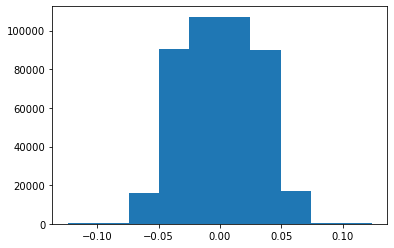

In [9]:
plt.figure()
plt.hist(weights_tf)
plt.show()

In [43]:
datasets = [EDFData_TF(path_glob, batch_size=32, channels=["C3"]) for path_glob in tqdm(sorted_files_no_10)]

100%|██████████| 13/13 [01:28<00:00,  6.80s/it]


In [44]:
datasets[0]

In [46]:
datasets[0].concat(datasets[1])

AttributeError: 'EDFData_TF' object has no attribute 'concat'

In [47]:
from sklearn.metrics import f1_score

In [9]:
def EDFGenerator(path, channels):
    def get_epochs():
        data = mne.io.read_raw_edf(path)
        sampling_rate = data.info['sfreq']
        events, events_id = mne.events_from_annotations(data, regexp='Sleep stage [A-Z]\d*')

        tmax = 30. - 1. / sampling_rate  # tmax is included
        epochs = mne.Epochs(raw=data, 
                            events=events,
                            event_id=events_id,
                            tmin=0., 
                            tmax=tmax, 
                            baseline=None, 
                            event_repeated='merge',
                            picks=channels)

        epochs.drop_bad()
        return epochs, sampling_rate
    epochs, sampling_rate = get_epochs()
    for idx in range(len(epochs)):
        X = epochs[idx].get_data()
        ## Remove the batch dim because we want to retrieve the data one sample by one
        X = X.squeeze(axis=0)
        X = X.transpose()

        Y = epochs[idx].events[:,-1]-1
        yield X, Y

In [38]:
for a, b in EDFGenerator("../Data/PSG1.edf", channels=["C3", "C4"]):
    break
a.shape, b.shape

((15360, 2), (1,))

In [48]:
dataset_tf = tf.data.Dataset.from_generator(EDFGenerator,
                                            output_types=(tf.float32, tf.int32),
                                            args=("../Data/PSG1.edf", ["C3", "C4"]))

In [67]:
 dataset_tf = tf.data.Dataset.from_generator(lambda: EDFGenerator("../Data/PSG1.edf", ["C3", "C4"]),
                                            output_types=(tf.float32, tf.int32),
                                            output_shapes=(tf.TensorShape((15360, 2)),
                                                           tf.TensorShape(1)))

<BatchDataset shapes: ((None, 15360, 2), (None, 1)), types: (tf.float32, tf.int32)>

In [74]:
for a, b in dataset_tf.batch(32):
    break
a.shape,b.shape

(TensorShape([32, 15360, 2]), TensorShape([32, 1]))

In [75]:
history = model_tf.fit(dataset_tf.batch(32), epochs=2)

Epoch 1/2
28/28 [==============================] - 31s 1s/step - loss: 1.4348 - accuracy: 0.3594
Epoch 2/2
28/28 [==============================] - 7s 232ms/step - loss: 1.4309 - accuracy: 0.3594


In [10]:
 dataset_tf_1 = tf.data.Dataset.from_generator(lambda: EDFGenerator("../Data/PSG1.edf", ["C3", "C4"]),
                                            output_types=(tf.float32, tf.int32),
                                            output_shapes=(tf.TensorShape((15360, 2)),
                                                           tf.TensorShape(1)))
 dataset_tf_2 = tf.data.Dataset.from_generator(lambda: EDFGenerator("../Data/PSG2.edf", ["C3", "C4"]),
                                            output_types=(tf.float32, tf.int32),
                                            output_shapes=(tf.TensorShape((15360, 2)),
                                                           tf.TensorShape(1)))                                            

In [13]:
dataset_tf_1_2 = dataset_tf_1.concatenate(dataset_tf_2)

In [79]:
len(dataset_tf_1_2)

TypeError: dataset length is unknown.

In [60]:
idx_train

array([    1,     2,     3, ..., 15030, 15035, 15038])

In [15]:
mask = np.zeros(shape=(len(idx_train)+len(idx_test)))
mask.shape

(15041,)

In [25]:
mask_train = mask.copy()
mask_test = mask.copy()
mask_train[idx_train] = 1
mask_test[idx_test] = 1

In [26]:
mask_train

array([0., 1., 1., ..., 1., 0., 0.])

In [27]:
mask_test

array([1., 0., 0., ..., 0., 1., 1.])

In [51]:
# Create filter function:
def filter_fn(idx, value):
    return idx in idx_train

# The above is not going to work in graph mode
# We are wrapping it with py_function to execute it eagerly
def py_function_filter(idx, value):
    return tf.py_function(filter_fn, (idx, value), tf.bool)


In [58]:
# Filter the dataset as usual:
dataset_tf_1_2_f = dataset_tf_1_2.enumerate().filter(py_function_filter)

In [55]:
for a in dataset_tf_1_2_f.enumerate():
    break
a

NameError: name 'a' is not defined

In [ ]:
for i, data in dataset_tf_1_2_f.enumerate():
    pass
i

In [10]:
 dataset_tf_1 = tf.data.Dataset.from_generator(lambda: EDFGenerator("../Data/PSG1.edf", ["C3", "C4"]),
                                            output_types=(tf.float32, tf.int32),
                                            output_shapes=(tf.TensorShape((15360, 2)),
                                                           tf.TensorShape(1)))
 dataset_tf_2 = tf.data.Dataset.from_generator(lambda: EDFGenerator("../Data/PSG2.edf", ["C3", "C4"]),
                                            output_types=(tf.float32, tf.int32),
                                            output_shapes=(tf.TensorShape((15360, 2)),
                                                           tf.TensorShape(1)))                                            

In [78]:
mask_train_bool = (mask_train == 1).tolist()

In [88]:
for idx, x in dataset_tf_1_2.enumerate():
    break

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=0>>

In [89]:
idx.numpy()

0

In [95]:
# Create filter function:
def filter_fn(idx, value):
    return mask_train_bool[idx.numpy()]

# The above is not going to work in graph mode
# We are wrapping it with py_function to execute it eagerly
def py_function_filter(idx, value):
    return tf.py_function(filter_fn, (idx, value), tf.bool)

In [96]:
dataset_tf_1_2.enumerate().filter(py_function_filter)

TypeError: in user code:

    <ipython-input-47-6c44737a28ea>:8 py_function_filter  *
        return tf.py_function(filter_fn, (idx, value), tf.bool)
    C:\Users\vila_\anaconda3\envs\Master\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    C:\Users\vila_\anaconda3\envs\Master\lib\site-packages\tensorflow\python\ops\script_ops.py:456 eager_py_func
        return _internal_py_func(
    C:\Users\vila_\anaconda3\envs\Master\lib\site-packages\tensorflow\python\ops\script_ops.py:337 _internal_py_func
        result = gen_script_ops.eager_py_func(
    C:\Users\vila_\anaconda3\envs\Master\lib\site-packages\tensorflow\python\ops\gen_script_ops.py:68 eager_py_func
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\vila_\anaconda3\envs\Master\lib\site-packages\tensorflow\python\framework\op_def_library.py:444 _apply_op_helper
        raise TypeError(

    TypeError: Tensors in list passed to 'input' of 'EagerPyFunc' Op have types [int64, <NOT CONVERTIBLE TO TENSOR>] that are invalid. Tensors: (<tf.Tensor 'args_0:0' shape=() dtype=int64>, (<tf.Tensor 'args_1:0' shape=(15360, 2) dtype=float32>, <tf.Tensor 'args_2:0' shape=(1,) dtype=int32>))
